# **CUSTOMER ATTRITION**


Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,roc_curve,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

pd.options.display.max_rows=None

In [0]:
raw_df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [0]:
df=raw_df.copy()

## **DATA OVERVIEW**

In [213]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [214]:
df.shape

(7043, 21)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [216]:
print('Unique values in features\n ')
df.nunique()

Unique values in features
 


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## **TARGET VARIABLE PIE PLOT**

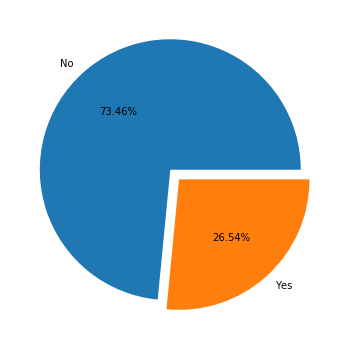

In [217]:
plt.figure(figsize=(8,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
plt.show()

*Data is balanced*

In [218]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [0]:
df.drop('customerID',axis=1,inplace=True)

# **VISUALIZATION OF FEATURES**

In [220]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

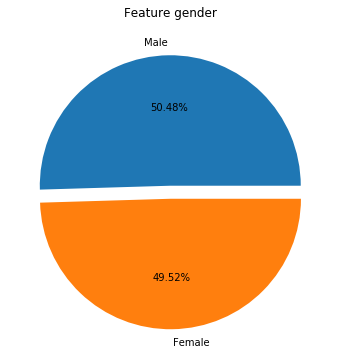

In [221]:
plt.figure(figsize=(8,6))
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%',explode=(0,0.1))
plt.title('Feature gender')
plt.show()

In [222]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [0]:
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:'No',1:'Yes'})

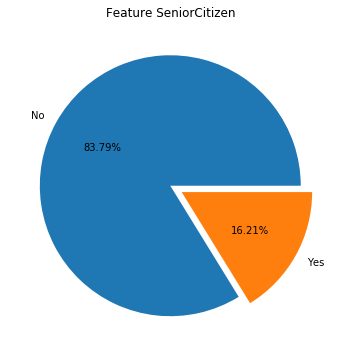

In [224]:
plt.figure(figsize=(8,6))
plt.pie(df['SeniorCitizen'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
plt.title('Feature SeniorCitizen')
plt.show()

In [225]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

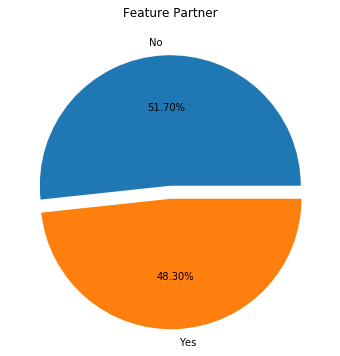

In [226]:
plt.figure(figsize=(8,6))
plt.pie(df['Partner'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
plt.title('Feature Partner')
plt.show()

In [227]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

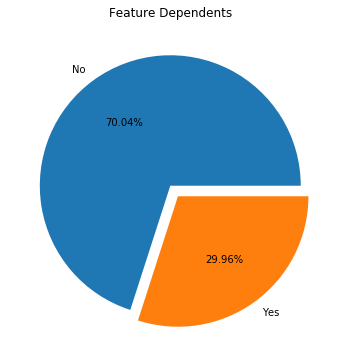

In [228]:
plt.figure(figsize=(8,6))
plt.pie(df['Dependents'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
plt.title('Feature Dependents')
plt.show()

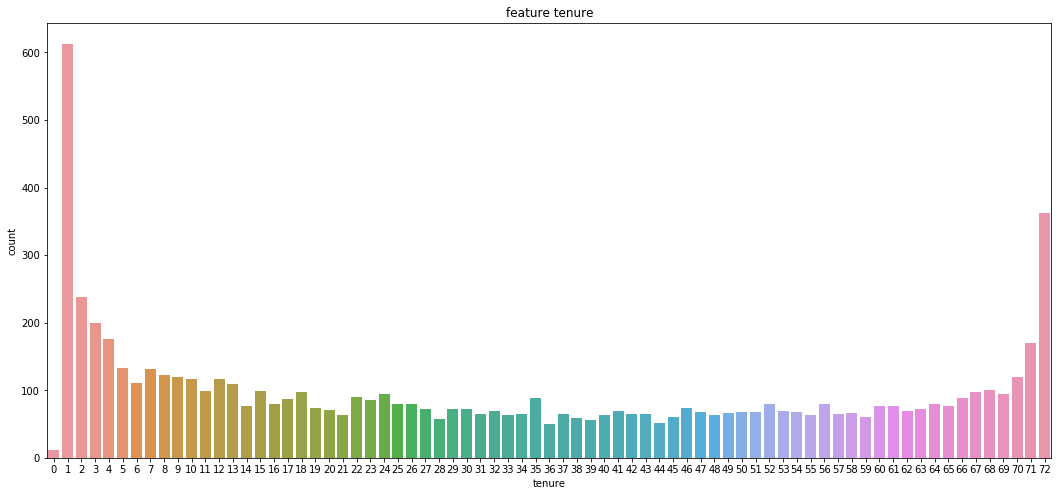

In [229]:
plt.figure(figsize=(18,8))
sns.countplot(df['tenure'])
plt.title('feature tenure')
plt.show()

In [230]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

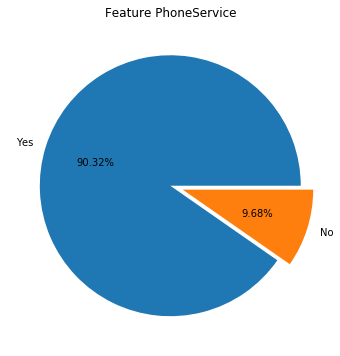

In [231]:
plt.figure(figsize=(8,6))
plt.pie(df['PhoneService'].value_counts(),labels=['Yes','No'],autopct='%1.2f%%',explode=(0,0.1))
plt.title('Feature PhoneService')
plt.show()

In [232]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

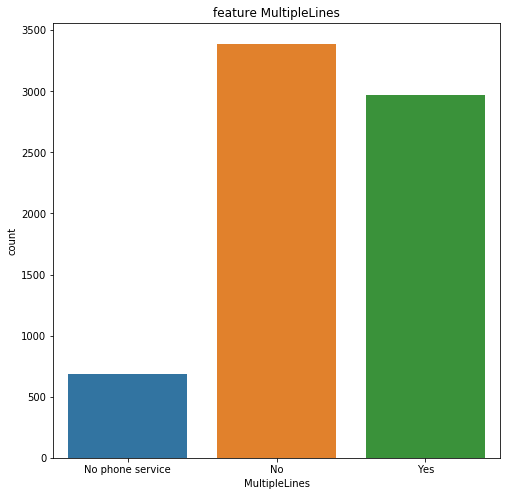

In [233]:
plt.figure(figsize=(8,8))
sns.countplot(df['MultipleLines'])
plt.title('feature MultipleLines')
plt.show()

In [234]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

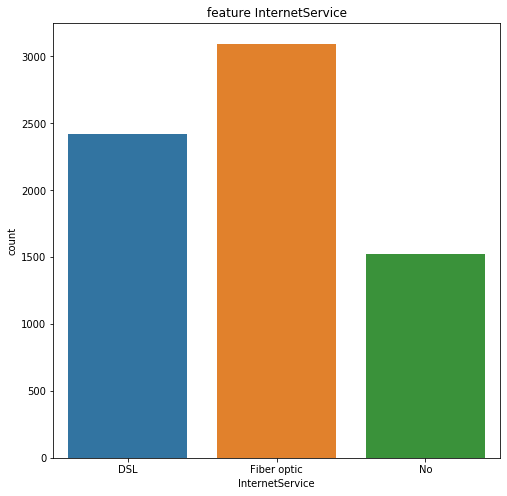

In [235]:
plt.figure(figsize=(8,8))
sns.countplot(df['InternetService'])
plt.title('feature InternetService')
plt.show()

In [236]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

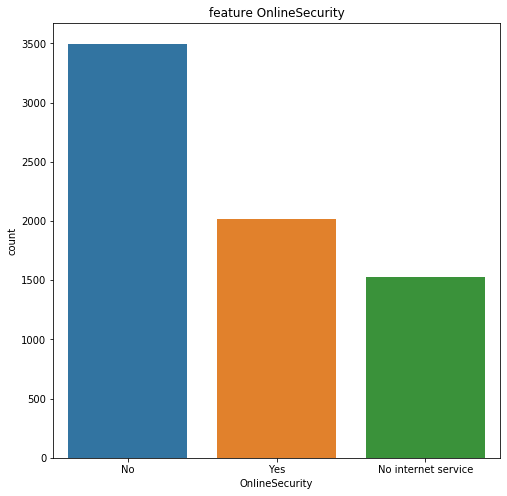

In [237]:
plt.figure(figsize=(8,8))
sns.countplot(df['OnlineSecurity'])
plt.title('feature OnlineSecurity')
plt.show()

In [238]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

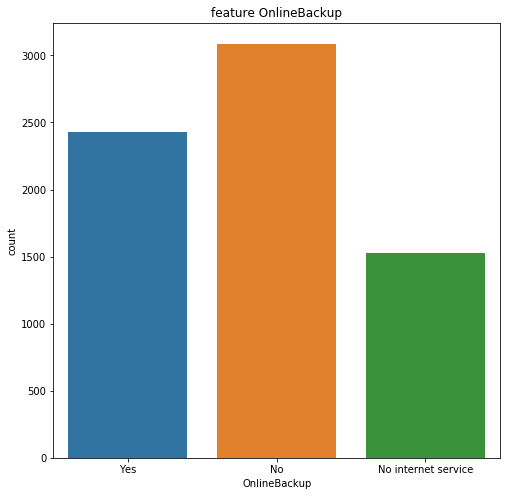

In [239]:
plt.figure(figsize=(8,8))
sns.countplot(df['OnlineBackup'])
plt.title('feature OnlineBackup')
plt.show()

In [240]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

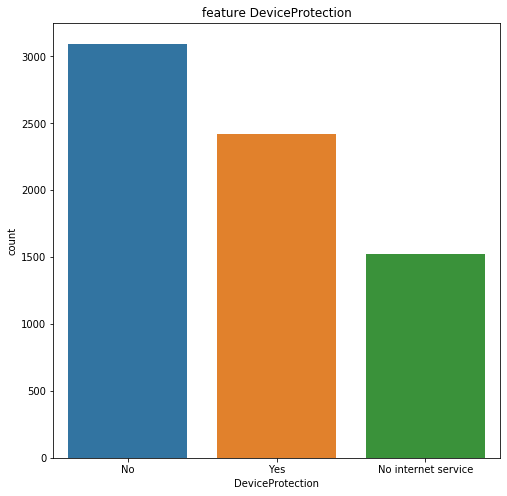

In [241]:
plt.figure(figsize=(8,8))
sns.countplot(df['DeviceProtection'])
plt.title('feature DeviceProtection')
plt.show()

In [242]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

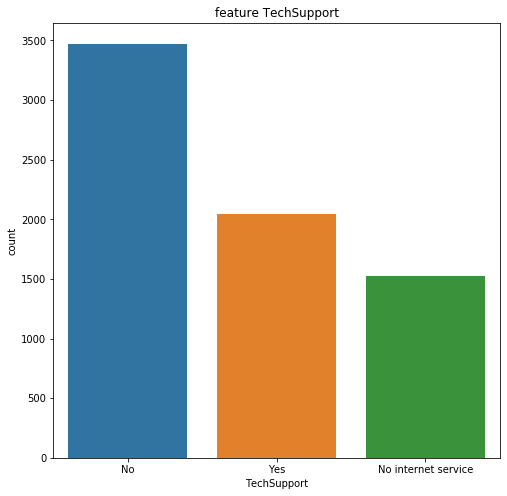

In [243]:
plt.figure(figsize=(8,8))
sns.countplot(df['TechSupport'])
plt.title('feature TechSupport')
plt.show()

In [244]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

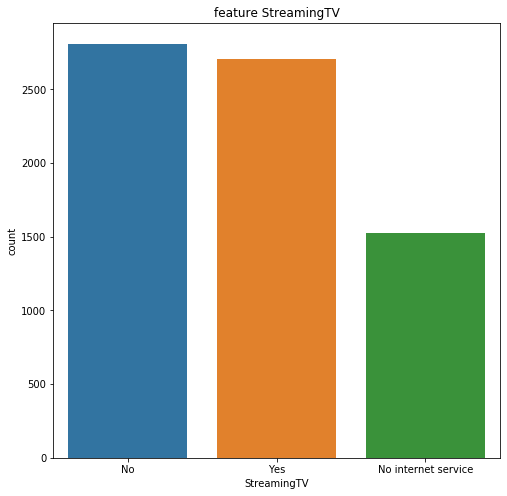

In [245]:
plt.figure(figsize=(8,8))
sns.countplot(df['StreamingTV'])
plt.title('feature StreamingTV')
plt.show()

In [246]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [247]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

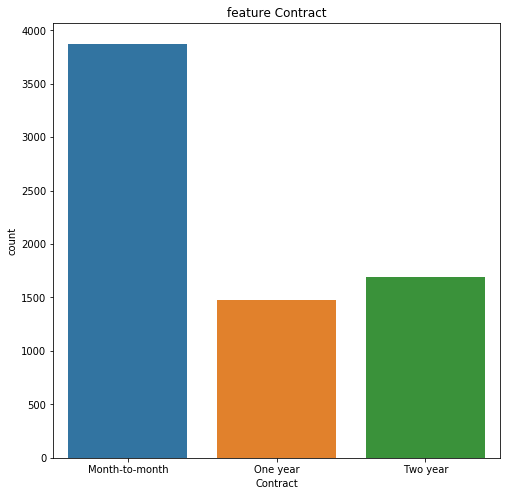

In [248]:
plt.figure(figsize=(8,8))
sns.countplot(df['Contract'])
plt.title('feature Contract')
plt.show()

In [249]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

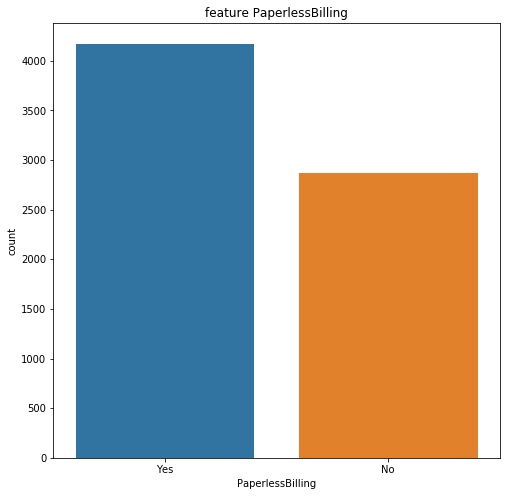

In [250]:
plt.figure(figsize=(8,8))
sns.countplot(df['PaperlessBilling'])
plt.title('feature PaperlessBilling')
plt.show()

In [251]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

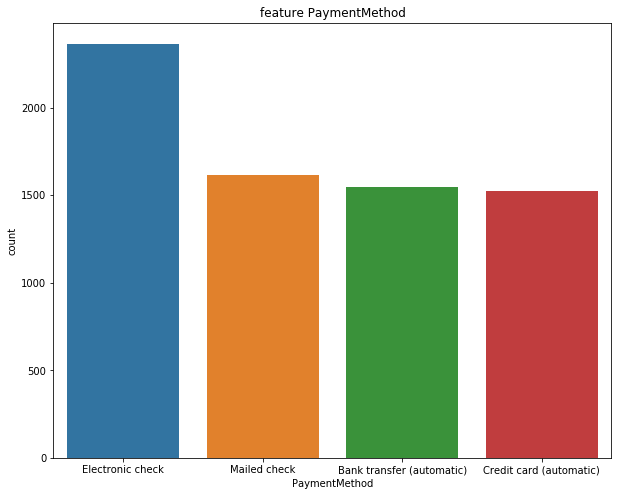

In [252]:
plt.figure(figsize=(10,8))
sns.countplot(df['PaymentMethod'])
plt.title('feature PaymentMethod')
plt.show()

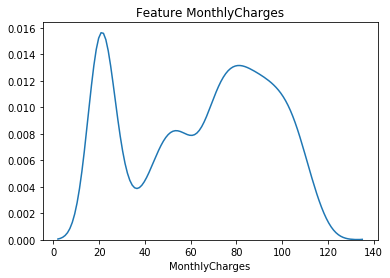

In [253]:
sns.distplot(df['MonthlyCharges'],hist=False)
plt.title('Feature MonthlyCharges')
plt.show()

In [254]:
na_list=[]
for k,i in enumerate(df['TotalCharges']):
  try:
    df[df['TotalCharges']==i]['TotalCharges'].astype('float')
  except ValueError:
    print('error on line = ',k)
    na_list.append(k)


error on line =  488
error on line =  753
error on line =  936
error on line =  1082
error on line =  1340
error on line =  3331
error on line =  3826
error on line =  4380
error on line =  5218
error on line =  6670
error on line =  6754


In [0]:

df.drop(na_list,inplace=True)

In [256]:
df.shape

(7032, 20)

In [0]:
df['TotalCharges']=df['TotalCharges'].astype('float')


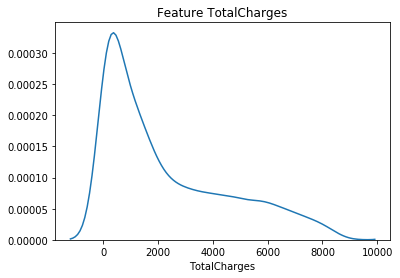

In [258]:
sns.distplot(df['TotalCharges'],hist=False)
plt.title('Feature TotalCharges')
plt.show()

In [259]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


# **STATISTICAL TESTS**

### **CHISQUARE TEST FOR ALL CATEGORICAL FEATURES**

In [261]:
cat_df=df.select_dtypes(include='object')
cat_df=cat_df.drop('Churn',axis=1)
insig_list=[]
for k in cat_df.columns:
  test_val,p_val,dof,arr=stats.chi2_contingency(pd.crosstab(df['Churn'],df[k]))
  print('For {} feature, test Statistic value = {} and p-value = {} \n'.format(k,test_val,p_val))
  if p_val>0.05:
    print('Feature {} is insignificant \n'.format(k))
    insig_list.append(k)


For gender feature, test Statistic value = 0.47545453727386294 and p-value = 0.4904884707065509 

Feature gender is insignificant 

For SeniorCitizen feature, test Statistic value = 158.4408162893713 and p-value = 2.4792557203954705e-36 

For Partner feature, test Statistic value = 157.50315146557506 and p-value = 3.97379757451591e-36 

For Dependents feature, test Statistic value = 186.32163933855873 and p-value = 2.0196592017051303e-42 

For PhoneService feature, test Statistic value = 0.8737327674431736 and p-value = 0.34992398942431924 

Feature PhoneService is insignificant 

For MultipleLines feature, test Statistic value = 11.271540824020612 and p-value = 0.0035679273999811405 

For InternetService feature, test Statistic value = 728.6956143058695 and p-value = 5.831198962236941e-159 

For OnlineSecurity feature, test Statistic value = 846.6773889208487 and p-value = 1.4006867477839222e-184 

For OnlineBackup feature, test Statistic value = 599.1751847059026 and p-value = 7.7760

In [262]:
insig_list

['gender', 'PhoneService']

In [0]:
df.drop(['gender','PhoneService'],axis=1,inplace=True)

## **CORRELATION BETWEEN NUMERICAL FEATURES**

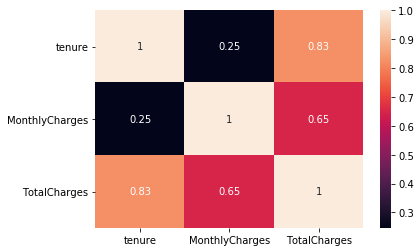

In [264]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [265]:
cat_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## **CHANGING CATEGORICAL FEATURES INTO DUMMY VARIABLES**

In [0]:
X=df.drop('Churn',axis=1)
df['Churn']=df['Churn'].replace({'No':0,'Yes':1})
y=df['Churn']


In [0]:
new_X=pd.get_dummies(X,prefix=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                      ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [268]:
new_X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [269]:
new_X.shape

(7032, 42)

# **MODEL BUILDING**

## **SPLITTING DATA INTO TRAIN AND TEST**


In [0]:
X_train,X_test,y_train,y_test=train_test_split(new_X, y, test_size=0.2, random_state=0)


## **BASELINE DECISION TREE**

In [271]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [272]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4125
           1       1.00      0.99      0.99      1500

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



In [273]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1038
           1       0.48      0.50      0.49       369

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407



## **BALANCING DATA WITH SMOTE**

In [274]:
smote=SMOTE(ratio='minority')
X_sm,y_sm=smote.fit_sample(new_X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## **BASELINE DECISION TREE WITH SMOTE DATA**

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)


In [276]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [277]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4157
           1       1.00      1.00      1.00      4103

    accuracy                           1.00      8260
   macro avg       1.00      1.00      1.00      8260
weighted avg       1.00      1.00      1.00      8260



In [278]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1006
           1       0.82      0.82      0.82      1060

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



*We can observe that after the balancing of data the precision,recall, f1-score for 'Yes' target category also increased significantly.*

## **EVALUATION AND VISUALIZATION OF AUC IN ROC CURVE**

In [0]:
prob=dt.predict_proba(X_test)

In [280]:
print('roc = ',roc_auc_score(y_test,prob[:,1]))

roc =  0.8170172362054091


In [281]:
fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
print(fpr)
print(tpr)

[0.         0.18489066 0.18489066 0.18588469 0.18787276 1.        ]
[0.         0.81792453 0.81981132 0.81981132 0.81981132 1.        ]


In [0]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='0.5 roc line')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')## **EVALUATION AND VISUALIZATION OF AUC IN ROC CURVE**
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

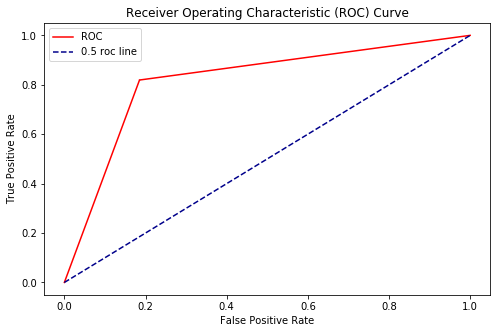

In [283]:
plot_roc_curve(fpr,tpr)

## **INFERENCES**

*The baseline decision tree model performed decent after smote implication on the dataset with auc score of 82.9%.<br>
With the hyper-parameter tuning of the decision tree the performance is supposed to increase.*

## **HYPERPARAMTER TUNING OF DECISION TREE**

In [284]:
dt_params={'max_depth':np.arange(1,18),'min_samples_leaf':np.arange(2,15)}
GS_dt=GridSearchCV(dt,dt_params,cv=3,scoring='neg_mean_squared_error')
GS_dt.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [285]:
GS_dt.best_params_

{'max_depth': 9, 'min_samples_leaf': 4}

In [286]:
hyper_dt=DecisionTreeClassifier(max_depth=8,min_samples_leaf=3,random_state=0)
hyper_dt.fit(X_train,y_train)
y_pred=hyper_dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1006
           1       0.84      0.82      0.83      1060

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [287]:
prob=hyper_dt.predict_proba(X_test)
print('AUC score = ',roc_auc_score(y_test,prob[:,1]))

AUC score =  0.9118079260287331


In [288]:
confusion_matrix(y_test,y_pred)

array([[844, 162],
       [186, 874]])

## **EVALUATION AND VISUALIZATION OF AUC IN ROC CURVE**

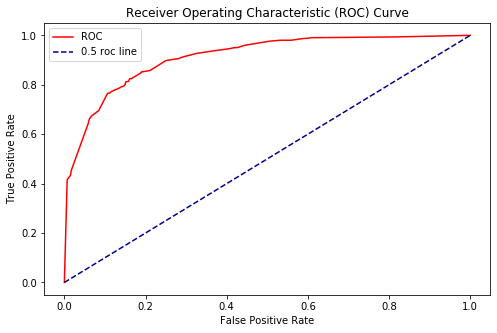

In [289]:
fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
plot_roc_curve(fpr,tpr)

## **INFERENCES**
*With hypertuned decision tree the auc score of the model has increased significantly to 91.18%*

# **MODELLING WITH RANDOM FOREST**

In [302]:
rf=RandomForestClassifier(random_state=0)
param_grid={'n_estimators':np.arange(1,40)}

GS_rf=GridSearchCV(rf,param_grid)
GS_rf.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [303]:
GS_rf.best_params_

{'n_estimators': 28}

In [304]:
hyper_rf=RandomForestClassifier(n_estimators=28,random_state=0)
hyper_rf.fit(X_train,y_train)
y_pred=hyper_rf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1006
           1       0.90      0.83      0.86      1060

    accuracy                           0.86      2066
   macro avg       0.87      0.86      0.86      2066
weighted avg       0.87      0.86      0.86      2066



In [306]:
prob=hyper_rf.predict_proba(X_test)
print('AUC score = ',roc_auc_score(y_test,prob[:,1]))

AUC score =  0.9299565812671144


In [307]:
confusion_matrix(y_test,y_pred)

array([[908,  98],
       [185, 875]])

## **EVALUATION AND VISUALIZATION OF AUC IN ROC CURVE**

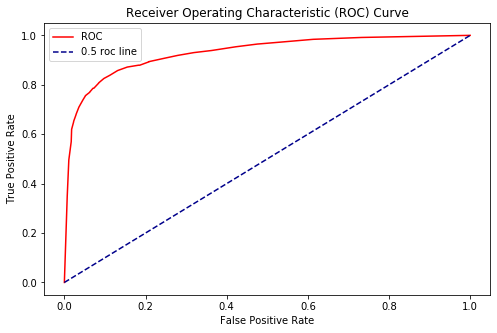

In [308]:
fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
plot_roc_curve(fpr,tpr)

## **INFERENCES**
With hypertuned randomforest classifier model the auc score has increased to 92.99%.